# Floyd-Warshall Algorithm


## Imports

In [94]:
import sys
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze, INF

import random

## Maze Generation Function

In [95]:
def BinaryTree(maze, min_value):
    flag = 0
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            temp = []
            if x > 0:
                temp.append('W')
            if y > 0:
                temp.append('N')
            if len(temp) == 0:
                continue
            direction = random.randint(0, len(temp)-1)
            maze.add_path((x, y), temp[direction], random.randint(min_value, 10))

## Floyd-Warshall Function

In [96]:
def FloydWarshall(maze, start, goal):
    neighbors = [(1,0,"S"),(-1,0,"N"),(0,1,"E"),(0,-1,"W")]
    n=len(maze.grid)
    m=len(maze.grid[0])
    dist=[[INF]*(n*m) for i in range(n*m)]
    nxt=[[0]*(n*m) for i in range(n*m)]
    startInd=start[0]*m+start[1]
    goalInd=goal[0]*m+goal[1]
    for i in range(n*m):
        dist[i][i]=0
        y=i//m
        x=i%m
        for j in neighbors:
            if maze.grid[y][x].neighbors[j[2]]!=INF:
                dist[i][i+j[0]*m+j[1]]=maze.grid[y][x].neighbors[j[2]]
                nxt[i][i+j[0]*m+j[1]]=(x+j[0],y+j[1])
    for k in range(n*m):
        for i in range(n*m):
            for j in range(n*m):                
                if dist[i][k]+dist[k][j] < dist[i][j]:
                    dist[i][j]=dist[i][k]+dist[k][j]
                    nxt[i][j]=nxt[i][k]
    if dist[startInd][goalInd]==INF:
        return False
    path=[start]
    while path[-1] != goal:
        print(path)
        pathInd=path[-1][0]*m+path[-1][1]
        path.append(nxt[pathInd][goalInd])
    return path

## Main

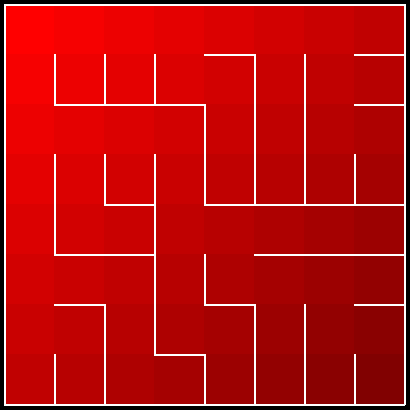

Path: 
[(0, 0)]
[(0, 0), (1, 0)]
[(0, 0), (1, 0), (1, 1)]
[(0, 0), (1, 0), (1, 1), (0, 1)]
[(0, 0), (1, 0), (1, 1), (0, 1), (1, -1)]
[(0, 0), (1, 0), (1, 1), (0, 1), (1, -1), (7, -1)]
[(0, 0), (1, 0), (1, 1), (0, 1), (1, -1), (7, -1), (8, 6)]


IndexError: list index out of range

In [97]:
N = int(input("Enter N (dimension): ").strip())
maze = Maze(N,N)
BinaryTree(maze, random.randint(4, 24))
maze.add_colors()
display(maze.draw())

start = (0, 0)
goal = (N-1, N-1)

print("Path: ")
path = FloydWarshall(maze, start, goal)
if path==False:
    print("No path exists")
else:
    print(path)